In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [2]:
# Orders dataset
df_orders = pd.read_csv('data/olist_orders_dataset.csv')

print(df_orders.info())
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
# Order reviews dataset
df_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
print(df_reviews.info())

df_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [4]:
# Order payments dataset
df_payments = pd.read_csv("data/olist_order_payments_dataset.csv")

print(df_payments.info())
df_payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
# Customers dataset
df_customers = pd.read_csv('data/olist_customers_dataset.csv')

print(df_customers.info())
df_customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Order Item dataset
df_order_items = pd.read_csv('data/olist_order_items_dataset.csv')
print(df_order_items.info())

df_order_items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
df_order_items[df_order_items['product_id'] == '4244733e06e7ecb4970a6e2683c13e61']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
8346,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96
36646,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33
49108,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17
55021,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29
70534,a0f9acf0b6294ed8561e32cde1a966bc,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-03 15:23:46,55.9,26.93
82756,bbf796534aaf9c59f8da8c7982db56e0,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-03-26 03:28:44,64.9,38.50
88891,c9ef97d2854afe64a3b4488bc2836af6,2,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-14 04:25:34,58.9,18.12
98401,df2d910b8b5e5f461f67043489f9569d,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-06-09 14:31:21,55.9,35.71


In [8]:
df_order_items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [9]:
df_order_items[(df_order_items['order_id'] == '0008288aa423d2a3f00fcb17cd7d8719') & (df_order_items['product_id'] == '368c6c730842d78016ad823897a372db')]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37


In [10]:
df_order_items[df_order_items['order_item_id'] == 21]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.8,6.57


In [11]:
df_order_items[(df_order_items['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef')]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


In [12]:
# Product dataset
df_products = pd.read_csv('data/olist_products_dataset.csv')

print(df_products.info())
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
# Sellers dataset
df_sellers = pd.read_csv('data/olist_sellers_dataset.csv')

print(df_sellers.info())

df_sellers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [14]:
# Geolocation dataset
df_geo = pd.read_csv('data/olist_geolocation_dataset.csv')
print(df_geo.info())

df_geo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [15]:
# Main table for analysis
df = pd.merge(df_orders, df_order_items, on='order_id')
df = pd.merge(df, df_customers, on='customer_id')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Order status: 
 delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64


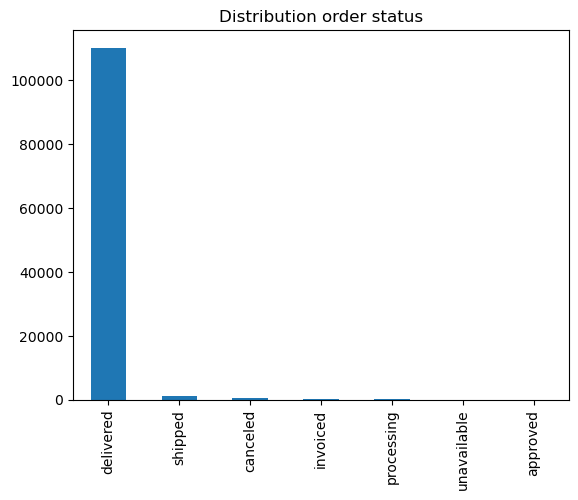

In [16]:
print("Order status: \n", df['order_status'].value_counts())
plt.title("Distribution order status")
df['order_status'].value_counts().plot(kind='bar')
plt.show()

NOTES: Our analysis will focus on completed transactions, so we filter the data only for 'delivered' status order.

In [17]:
df = df[df['order_status'] == 'delivered']

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110182 non-null  object 
 5   order_delivered_carrier_date   110195 non-null  object 
 6   order_delivered_customer_date  110189 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [18]:
# Let see why there is null value
# 1. order_approved_at
df[df['order_approved_at'].isnull()][['order_id', 'order_approved_at', 
                                          'order_delivered_carrier_date', 'order_delivered_customer_date']]


,order_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
5971,e04abd8149ef81b95221e88f6ed9ab6a,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33
18732,8a9adc69528e1001fc68dd0aaebbb54a,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06
21512,7013bcfc1c97fe719a7b5e05e61c12db,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38
25620,5cf925b116421afa85ee25e99b4c34fb,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47
26180,12a95a3c06dbaec84bcfb0e2da5d228a,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19
30328,c1d4211b3dae76144deccd6c74144a88,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01
43338,d69e5d356402adc8cf17e08b5033acfb,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58
44516,d77031d6a3c8a52f019764e68f211c69,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23
54770,7002a78c79c519ac54022d4f8a65e6e8,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19
69806,2eecb0d85f281280f79fa00f9cec1a95,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03


In [19]:
# 2. order_approved_at
df[df['order_delivered_carrier_date'].isnull()][['order_id', 'order_approved_at', 
                                                 'order_delivered_carrier_date', 'order_delivered_customer_date']]


,order_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
82887,2aa91108853cecb43c84a5dc5b277475,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47
104889,2d858f451373b04fb5c984a1cc2defaf,2017-05-25 23:30:16,NaN,NaN


In [20]:
# 3. order_delivered_customer_date
df[df['order_delivered_customer_date'].isnull()][['order_id', 'order_approved_at', 
                                                 'order_delivered_carrier_date', 'order_delivered_customer_date']]


,order_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
3358,2d1e2d5bf4dc7227b3bfebb81328c15f,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN
23324,f5dd62b788049ad9fc0526e3ad11a097,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN
49625,2ebdfc4f15f23b91474edf87475f108e,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN
89681,e69f75a717d64fc5ecdfae42b2e8e086,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN
93740,0d3268bad9b086af767785e3f0fc0133,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN
104889,2d858f451373b04fb5c984a1cc2defaf,2017-05-25 23:30:16,NaN,NaN
110584,ab7c89dc1bf4a1ead9d6ec1ec8968a84,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN
111024,20edc82cf5400ce95e1afacc25798b31,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN


NOTE: Since the columns is not our focus and the percentage of null value less than 1% (we assume this is human error), we just drop the columns.

In [21]:
drop_fields = ['customer_id',
               'order_status', 
               'order_approved_at', 
               'order_delivered_carrier_date', 
               'order_delivered_customer_date',
               'order_estimated_delivery_date', 
               'order_item_id',
               'shipping_limit_date',]

df = df.drop(drop_fields, axis=1)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  110197 non-null  object 
 1   order_purchase_timestamp  110197 non-null  object 
 2   product_id                110197 non-null  object 
 3   seller_id                 110197 non-null  object 
 4   price                     110197 non-null  float64
 5   freight_value             110197 non-null  float64
 6   customer_unique_id        110197 non-null  object 
 7   customer_zip_code_prefix  110197 non-null  int64  
 8   customer_city             110197 non-null  object 
 9   customer_state            110197 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 9.2+ MB
None


,order_id,order_purchase_timestamp,product_id,seller_id,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [22]:
# Unique

id_columns = ['order_id', 'customer_unique_id' ,'product_id', 'seller_id',]

df[id_columns].nunique()

order_id              96478
customer_unique_id    93358
product_id            32216
seller_id              2970
dtype: int64

NOTES: We can say that, an order have multiple items.

In [23]:
# Re-arrange data
not_id = [i for i in df.columns if i not in id_columns]

df = df[id_columns + not_id]
df = df.rename(columns={'order_purchase_timestamp': 'order_date'})
df['order_date'] = pd.to_datetime(df['order_date'])

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  110197 non-null  object        
 1   customer_unique_id        110197 non-null  object        
 2   product_id                110197 non-null  object        
 3   seller_id                 110197 non-null  object        
 4   order_date                110197 non-null  datetime64[ns]
 5   price                     110197 non-null  float64       
 6   freight_value             110197 non-null  float64       
 7   customer_zip_code_prefix  110197 non-null  int64         
 8   customer_city             110197 non-null  object        
 9   customer_state            110197 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 9.2+ MB
None


,order_id,customer_unique_id,product_id,seller_id,order_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,29.99,8.72,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,118.70,22.76,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,159.90,19.22,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,45.00,27.20,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,19.90,8.72,9195,santo andre,SP


In [24]:
## Filter only up to January 2017
df = df[df['order_date'] >= '2017-01-01']
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109880 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  109880 non-null  object        
 1   customer_unique_id        109880 non-null  object        
 2   product_id                109880 non-null  object        
 3   seller_id                 109880 non-null  object        
 4   order_date                109880 non-null  datetime64[ns]
 5   price                     109880 non-null  float64       
 6   freight_value             109880 non-null  float64       
 7   customer_zip_code_prefix  109880 non-null  int64         
 8   customer_city             109880 non-null  object        
 9   customer_state            109880 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 9.2+ MB
None


,order_id,customer_unique_id,product_id,seller_id,order_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,29.99,8.72,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,118.70,22.76,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,159.90,19.22,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,45.00,27.20,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,19.90,8.72,9195,santo andre,SP


# Product Analysis

In [25]:
# Last month date
print('Last transaction date:')
print(df.loc[df['order_date'] > '2018-07-01']['order_date'].max())

Last transaction date:
2018-08-29 15:00:37


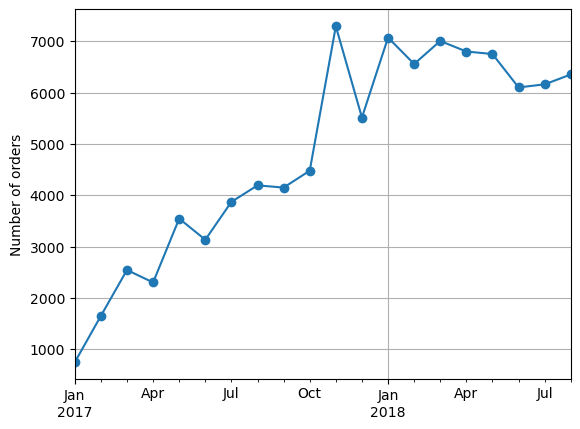

In [26]:
monthly_orders = df[['order_id', 'order_date']]\
                    .set_index('order_date')\
                    .resample('M')\
                    .nunique()
monthly_orders.plot(grid=True, marker='o', legend=False)
plt.ylabel('Number of orders')
plt.xlabel('')
plt.show()

In [77]:
monthly_orders

,order_id
order_date,
2017-01-31,750
2017-02-28,1653
2017-03-31,2546
2017-04-30,2303
2017-05-31,3546
2017-06-30,3135
2017-07-31,3872
2017-08-31,4193
2017-09-30,4150


In [79]:
monthly_unique_customers

order_date
2017-01-31     718
2017-02-28    1630
2017-03-31    2508
2017-04-30    2274
2017-05-31    3479
2017-06-30    3076
2017-07-31    3802
2017-08-31    4114
2017-09-30    4083
2017-10-31    4417
2017-11-30    7183
2017-12-31    5450
2018-01-31    6974
2018-02-28    6400
2018-03-31    6914
2018-04-30    6744
2018-05-31    6693
2018-06-30    6061
2018-07-31    6100
2018-08-31    6310
Freq: M, Name: customer_unique_id, dtype: int64

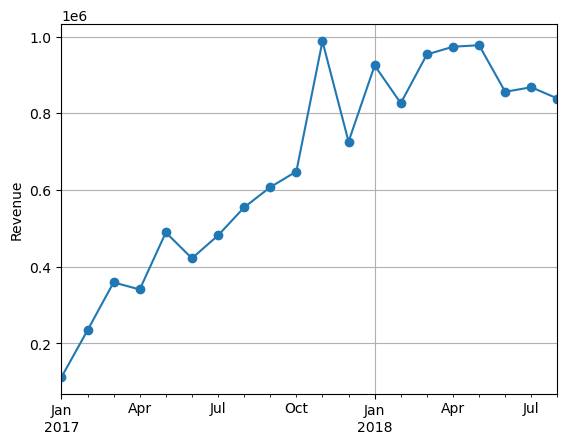

In [27]:
monthly_sales = df[['price', 'order_date']]\
                  .set_index('order_date')\
                  .resample('M')\
                  .sum()

monthly_sales.plot(grid=True, marker='o', legend=False)
plt.ylabel('Revenue')
plt.xlabel('')
plt.show()

NOTE:
- Based on the graph, the number of transactions and total revenue increased throughout 2017-2018, then stagnated from January to July 2018.

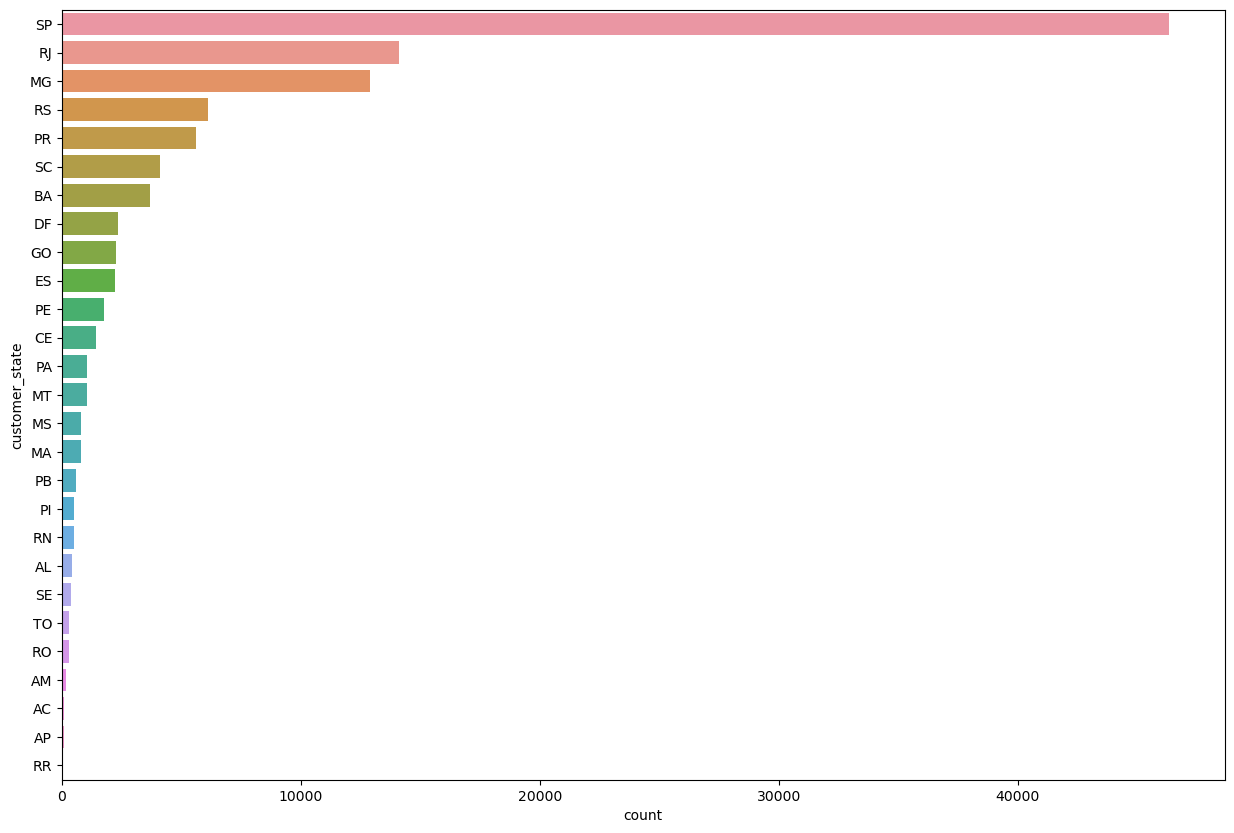

In [28]:
# Orders per state
orders_per_state = df[['order_id', 'customer_state']]\
                    .groupby('customer_state')\
                    .count()\
                    .sort_values(by='order_id', ascending=False)\
                    .reset_index()
orders_per_state
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y = 'customer_state', x = 'order_id', data=orders_per_state, ax=ax)
plt.xlabel('count')
plt.show()

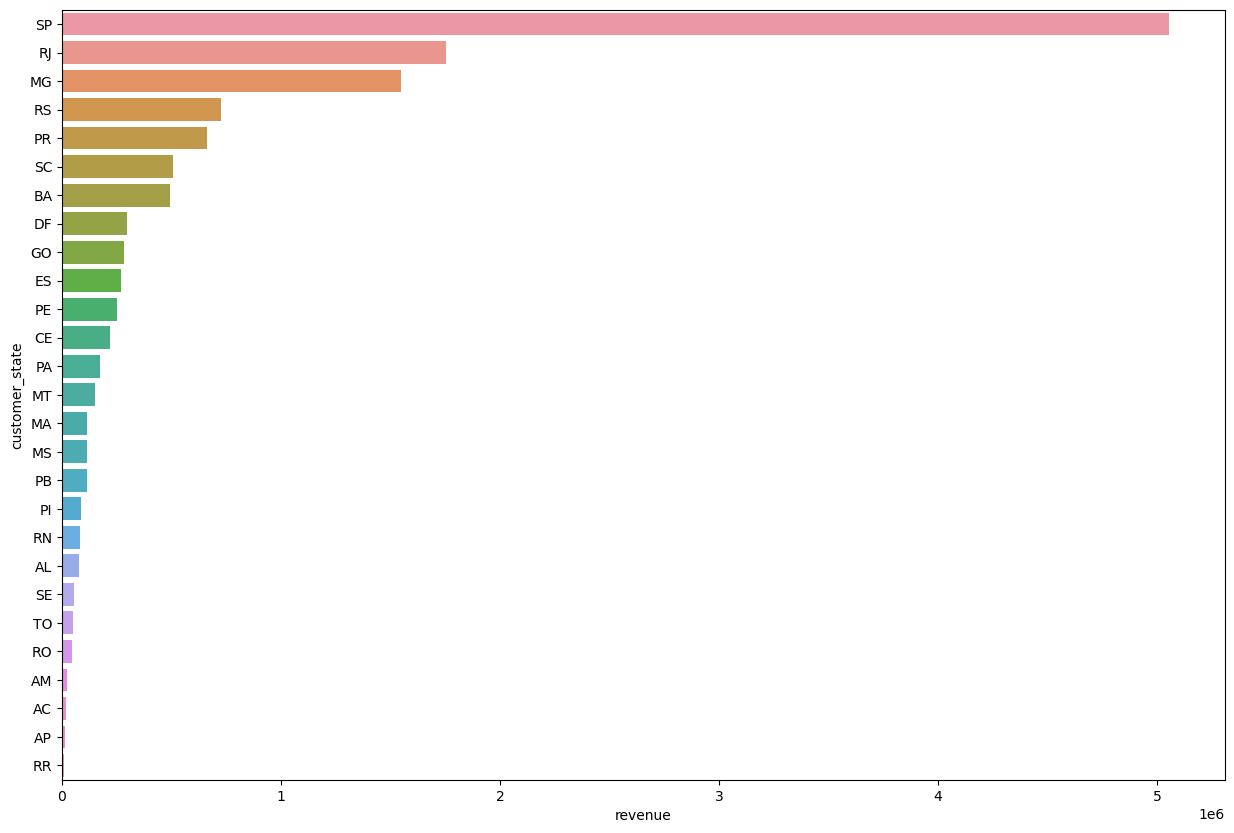

In [29]:
# Revenue per state

revenue_per_state = df[['price', 'customer_state']]\
                    .groupby('customer_state')\
                    .sum()\
                    .sort_values(by='price', ascending=False)\
                    .reset_index()

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y = 'customer_state', x = 'price', data=revenue_per_state, ax=ax)
plt.xlabel('revenue')
plt.show()

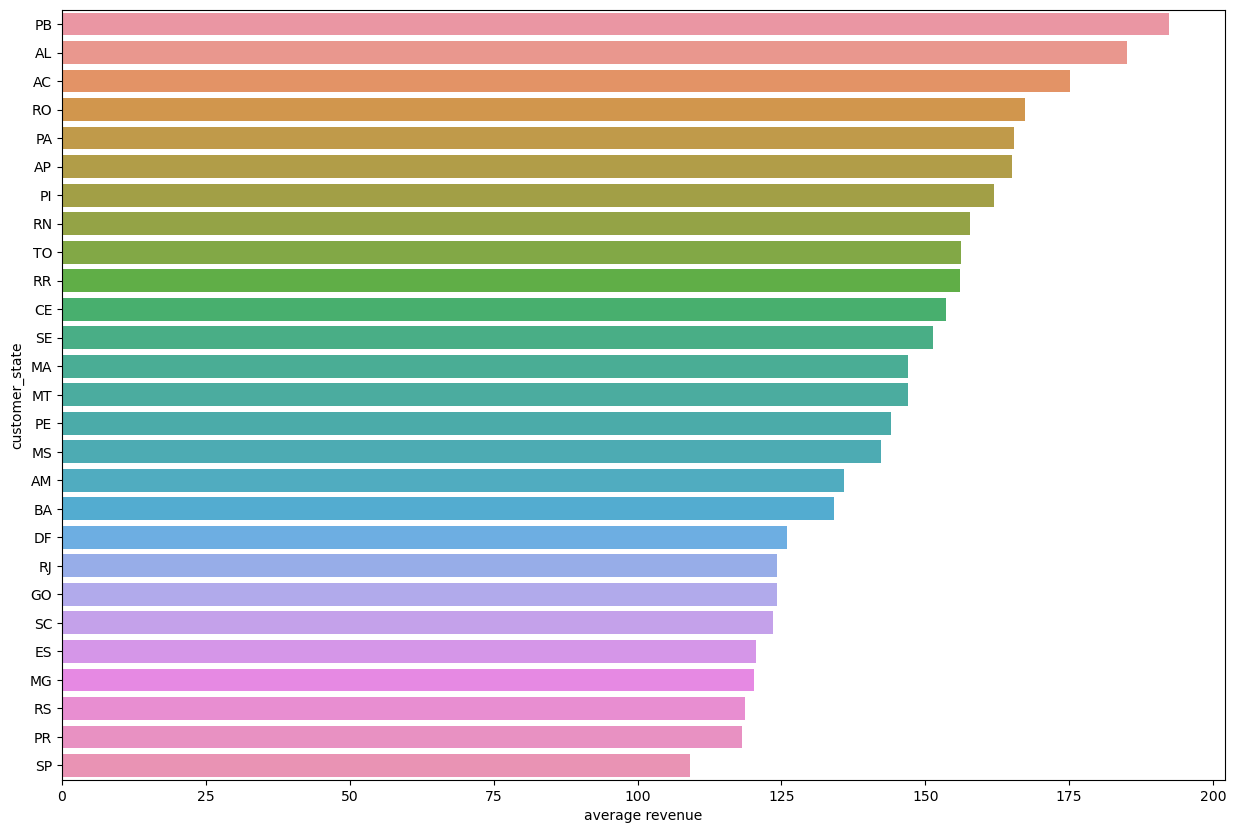

In [30]:
avg_revenue_per_state = revenue_per_state.set_index('customer_state')['price'] / \
                            orders_per_state.set_index('customer_state')['order_id']

avg_revenue_per_state = avg_revenue_per_state.reset_index()
avg_revenue_per_state = avg_revenue_per_state.rename(columns={0: 'avg_revenue'}).sort_values(by='avg_revenue', ascending=False)

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y = 'customer_state' , x = 'avg_revenue', data=avg_revenue_per_state, ax=ax)
plt.xlabel('average revenue')
plt.show()

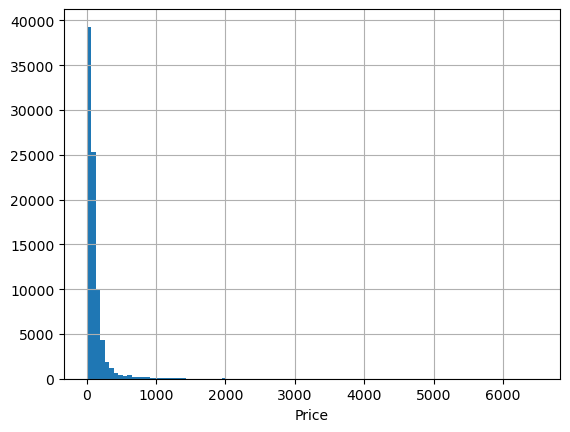

In [31]:
# Distribution price in [SP, RJ, MG, RS, PR]


df[(df['customer_state'] == 'SP') | (df['customer_state'] == 'RJ') | 
   (df['customer_state'] == 'MG') | (df['customer_state'] == 'RS') |
   (df['customer_state'] == 'PR')].price.hist(bins=100)
plt.xlabel('Price')
plt.show()

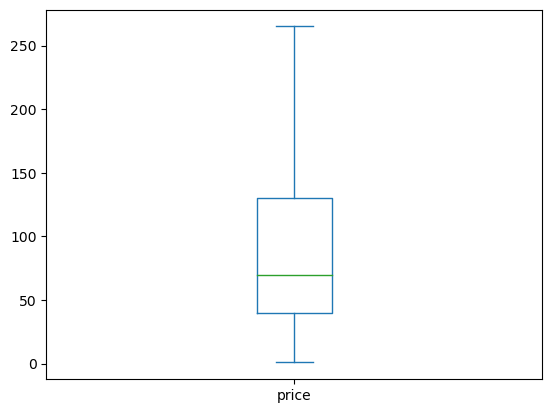

In [32]:
df[(df['customer_state'] == 'SP') | (df['customer_state'] == 'RJ') | 
   (df['customer_state'] == 'MG') | (df['customer_state'] == 'RS') |
   (df['customer_state'] == 'PR')].price.plot(kind='box', showfliers=False)

plt.show()

In [33]:
df[(df['customer_state'] == 'SP') | (df['customer_state'] == 'RJ') | 
   (df['customer_state'] == 'MG') | (df['customer_state'] == 'RS') |
   (df['customer_state'] == 'PR')].price.describe()


count    85048.000000
mean       114.589994
std        171.049625
min          0.850000
25%         39.710000
50%         69.990000
75%        129.900000
max       6499.000000
Name: price, dtype: float64

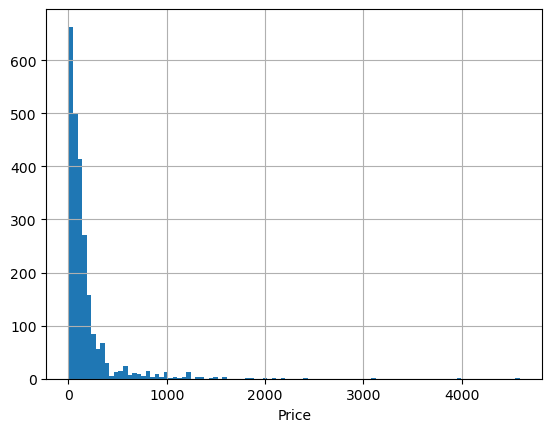

In [34]:
# Distribution price in ['PB', 'AL', 'AC', 'RO', 'PA']


df[(df['customer_state'] == 'PB') | (df['customer_state'] == 'AL') | 
   (df['customer_state'] == 'AC') | (df['customer_state'] == 'RO') |
   (df['customer_state'] == 'PA')].price.hist(bins=100)
plt.xlabel('Price')
plt.show()

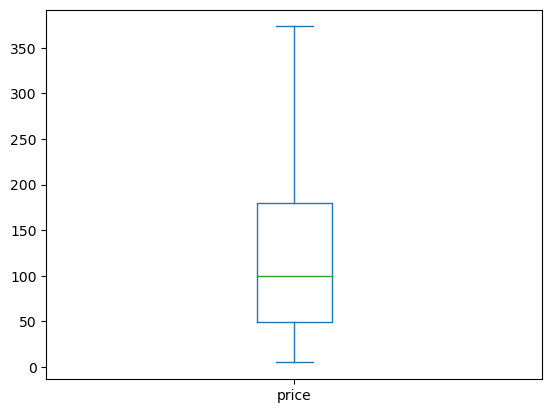

In [35]:
df[(df['customer_state'] == 'PB') | (df['customer_state'] == 'AL') | 
   (df['customer_state'] == 'AC') | (df['customer_state'] == 'RO') |
   (df['customer_state'] == 'PA')].price.plot(kind='box', showfliers=False)

plt.show()

In [36]:
# Distribution price in ['PB', 'AL', 'AC', 'RO', 'PA']


df[(df['customer_state'] == 'PB') | (df['customer_state'] == 'AL') | 
   (df['customer_state'] == 'AC') | (df['customer_state'] == 'RO') |
   (df['customer_state'] == 'PA')].price.describe()


count    2423.000000
mean      175.955167
std       278.777602
min         4.900000
25%        49.600000
50%        99.900000
75%       179.900000
max      4590.000000
Name: price, dtype: float64

Note:

According to the graph,
1. The number of transaction and total revenue for state SP, RJ, MG, RS, PR are in the top 5. But the average of sales is at the bottom 10. We could assume that people from state SP, RJ, MG, RS, PR commonly buy inexpensive items
2. Otherwise, the number of transaction and total revenue for state 'PB', 'AL', 'AC', 'RO', 'PA' are in the middle, But the average of sales is at the top 5. We could assume that the people from 'PB', 'AL', 'AC', 'RO', 'PA' commonly but expensive items.

In [37]:
# Top products
df_product_cat = pd.merge(df[['order_id', 'product_id', 'price', 'customer_state']], 
                        df_products[['product_id', 'product_category_name']], 
                        on='product_id')
print(df_product_cat.info())

df_product_cat.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109880 entries, 0 to 109879
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               109880 non-null  object 
 1   product_id             109880 non-null  object 
 2   price                  109880 non-null  float64
 3   customer_state         109880 non-null  object 
 4   product_category_name  108345 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.0+ MB
None


,order_id,product_id,price,customer_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,SP,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,87285b34884572647811a353c7ac498a,29.99,SP,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,87285b34884572647811a353c7ac498a,29.99,SP,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,87285b34884572647811a353c7ac498a,29.99,SC,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,118.70,BA,perfumaria


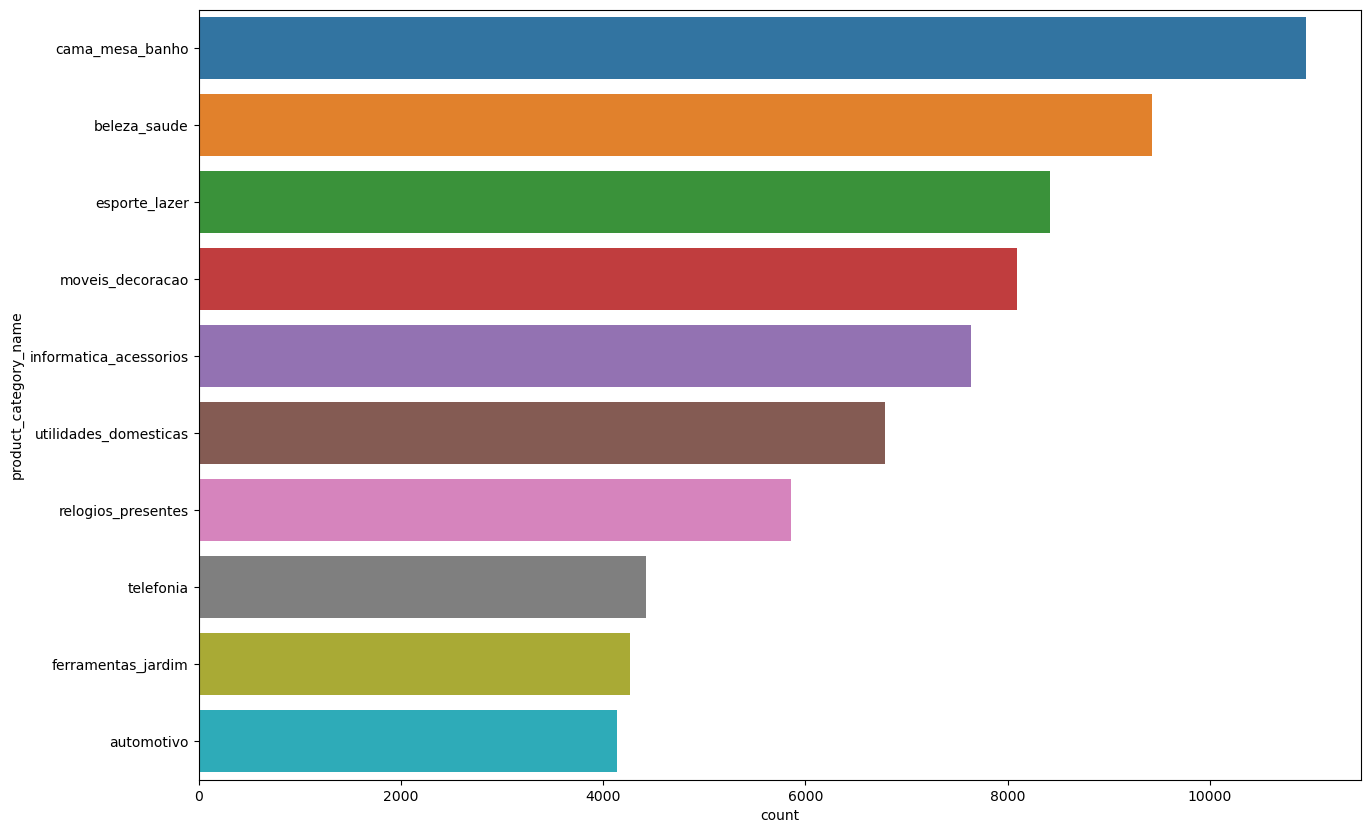

In [38]:
# Top-10 products (overall)

top_products_overall_freq = df_product_cat[['order_id', 'product_category_name']]\
                        .groupby('product_category_name')\
                        .count()\
                        .sort_values(by='order_id', ascending=False)\
                        .reset_index().head(10)

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y = 'product_category_name', x = 'order_id', data=top_products_overall_freq, ax=ax)
plt.xlabel('count')
plt.show()

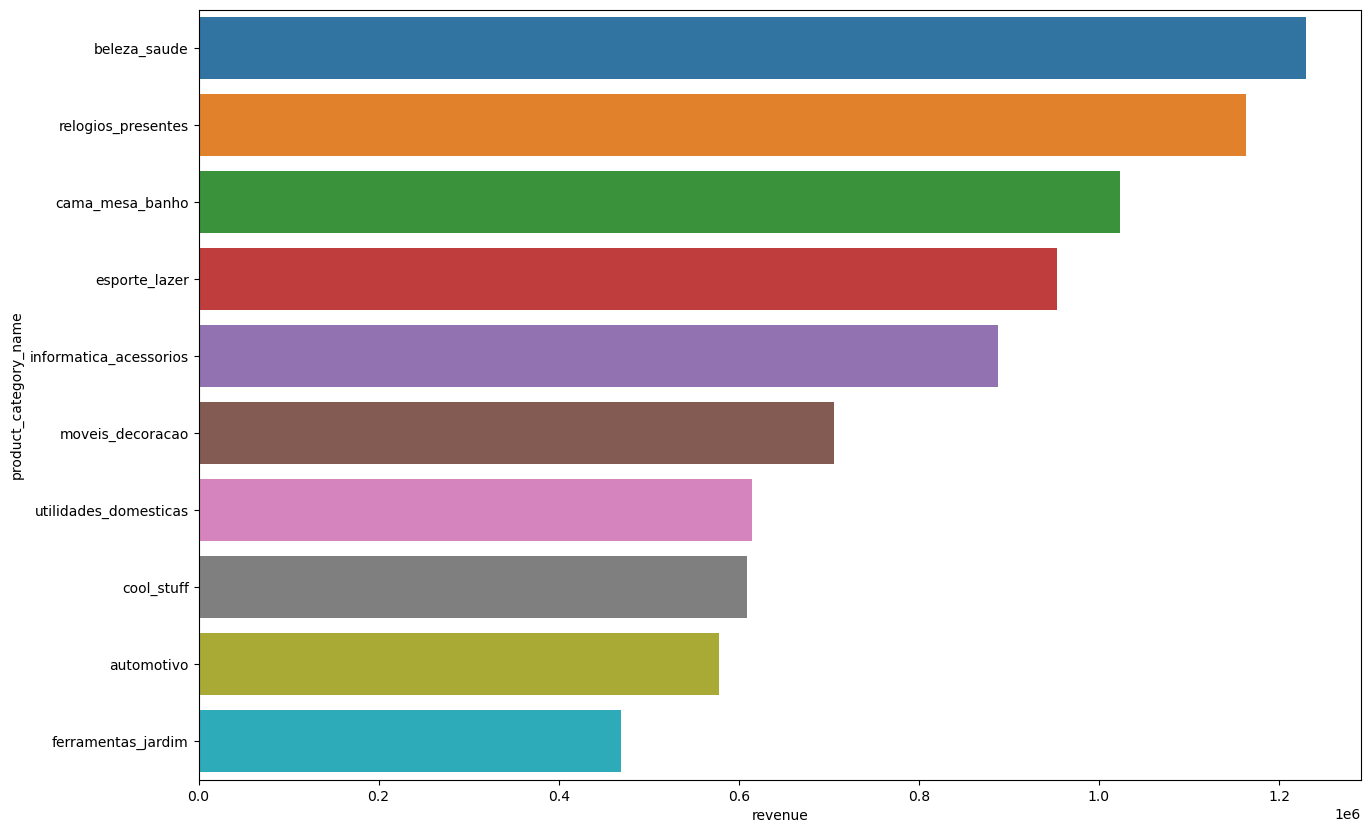

In [39]:
top_revenue_overall_freq = df_product_cat[['price', 'product_category_name']]\
                        .groupby('product_category_name')\
                        .sum()\
                        .sort_values(by='price', ascending=False)\
                        .reset_index().head(10)

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y = 'product_category_name', x = 'price', data=top_revenue_overall_freq, ax=ax)
plt.xlabel('revenue')
plt.show()

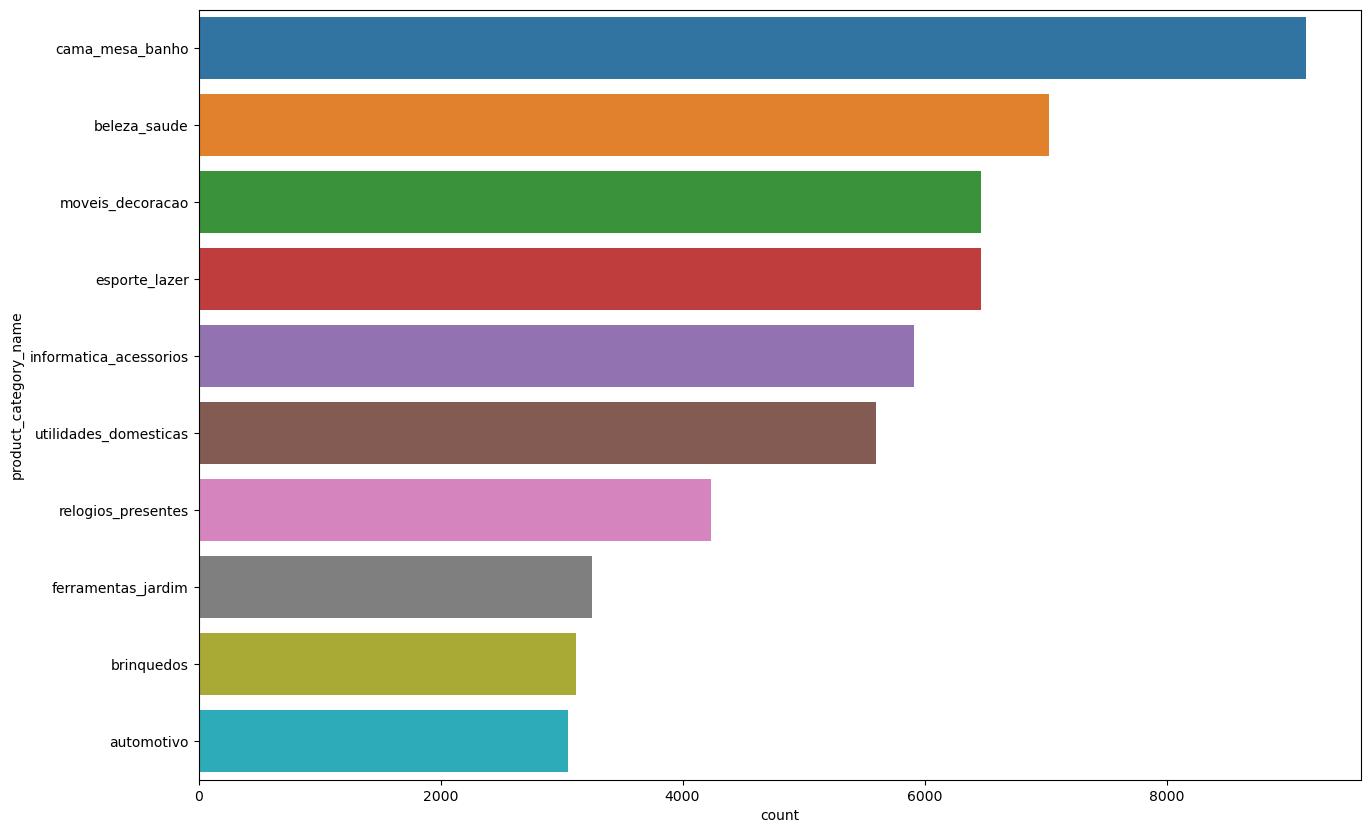

In [40]:
# Top-10 products (SP, RJ, MG, RS, PR) 
top_products_high_freq = df_product_cat[(df_product_cat['customer_state'] == 'SP') | 
                                        (df_product_cat['customer_state'] == 'RJ') |    
                                        (df_product_cat['customer_state'] == 'MG') | 
                                        (df_product_cat['customer_state'] == 'RS') |
                                        (df_product_cat['customer_state'] == 'PR')][['order_id', 'product_category_name']]\
                            .groupby('product_category_name')\
                            .count()\
                            .sort_values(by='order_id', ascending=False)\
                            .reset_index().head(10)


fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y = 'product_category_name', x = 'order_id', data=top_products_high_freq, ax=ax)
plt.xlabel('count')
plt.show()

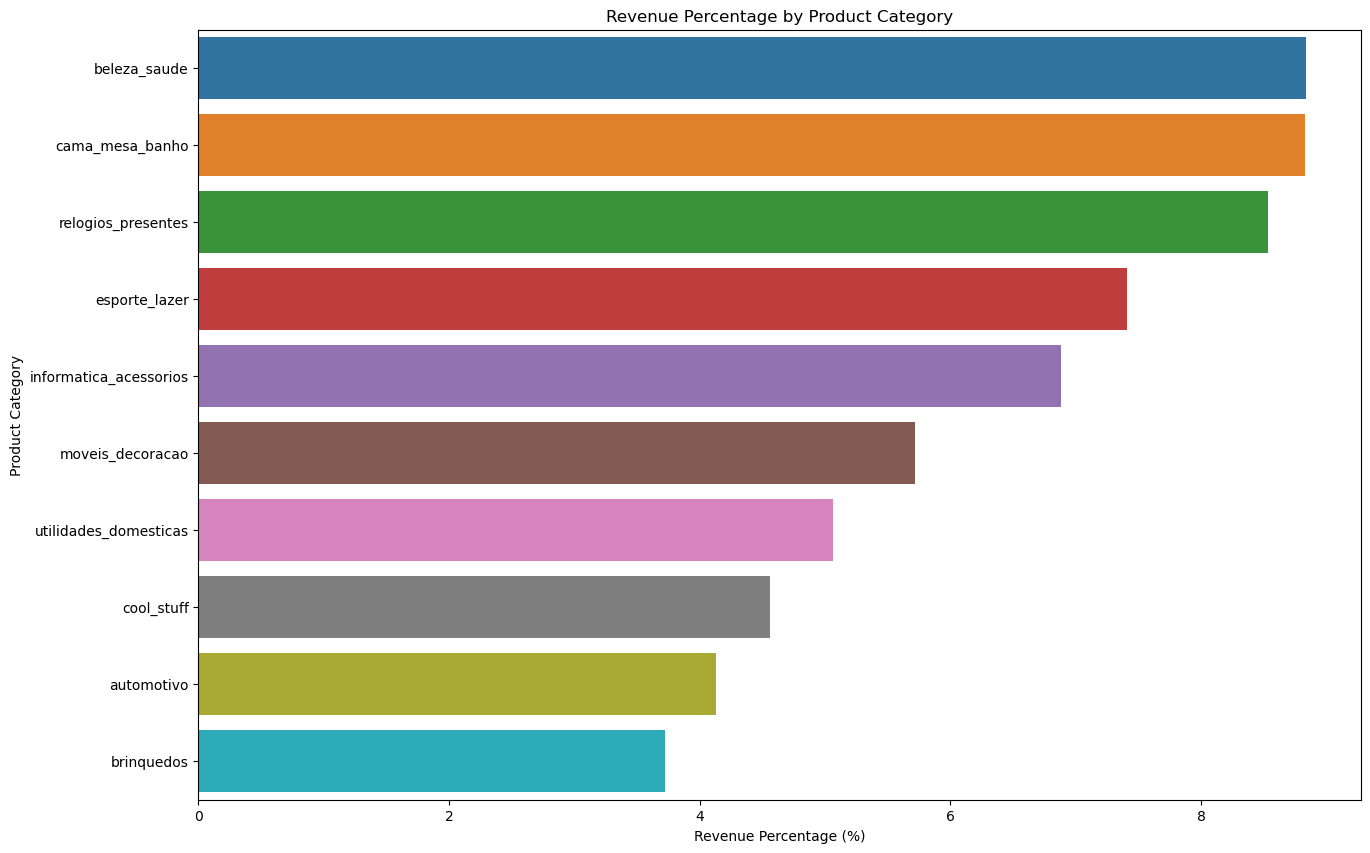

In [41]:
top_revenue_high_freq = df_product_cat[(df_product_cat['customer_state'] == 'SP') | 
                                        (df_product_cat['customer_state'] == 'RJ') |    
                                        (df_product_cat['customer_state'] == 'MG') | 
                                        (df_product_cat['customer_state'] == 'RS') |
                                        (df_product_cat['customer_state'] == 'PR')][['price', 'product_category_name']]\
                            .groupby('product_category_name')\
                            .sum()\
                            .sort_values(by='price', ascending=False)\
                            .reset_index()

# Calculate total revenue
total_revenue = top_revenue_high_freq['price'].sum()

# Calculate percentage of revenue for each category
top_revenue_high_freq['revenue_percentage'] = (top_revenue_high_freq['price'] / total_revenue) * 100

# Sort by revenue_percentage
top_revenue_high_freq = top_revenue_high_freq.sort_values(by='revenue_percentage', ascending=False).head(10)

# Plot the percentages
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(y='product_category_name', x='revenue_percentage', data=top_revenue_high_freq, ax=ax)
plt.xlabel('Revenue Percentage (%)')
plt.ylabel('Product Category')
plt.title('Revenue Percentage by Product Category')
plt.show()

In [42]:
df_product_cat[['product_category_name', 'price']]\
    .groupby('product_category_name')\
    .mean()\
    .loc[list(top_revenue_high_freq.product_category_name.values)]\
    .sort_values(by='price', ascending=False)

,price
product_category_name,
relogios_presentes,198.713221
cool_stuff,164.149286
automotivo,139.844722
beleza_saude,130.498567
brinquedos,116.620065
informatica_acessorios,116.359485
esporte_lazer,113.244640
cama_mesa_banho,93.463296
utilidades_domesticas,90.570783


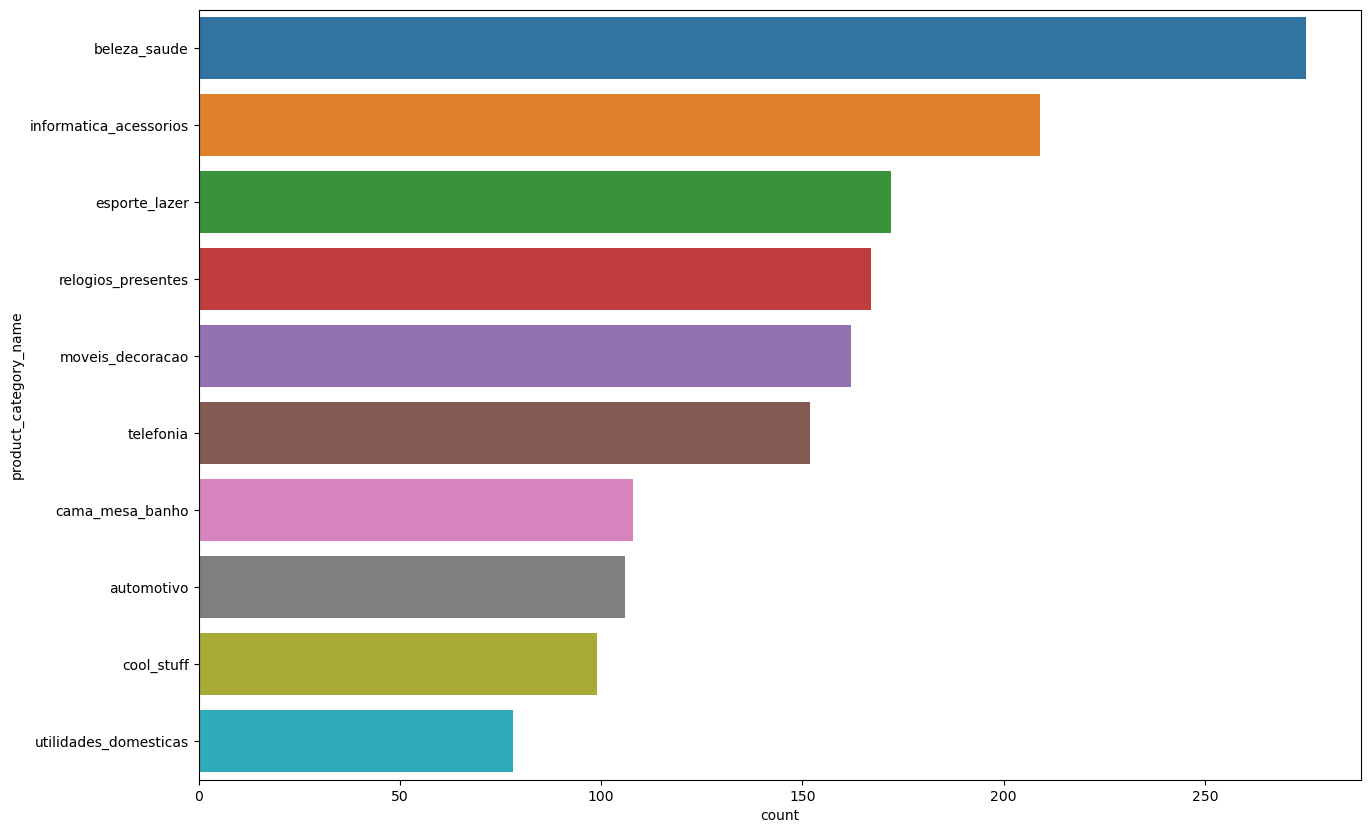

In [43]:
# Top-10 products (PB, AL, AC, RO, PA) 
top_products_low_freq = df_product_cat[(df_product_cat['customer_state'] == 'PB') | 
                                        (df_product_cat['customer_state'] == 'AL') |    
                                        (df_product_cat['customer_state'] == 'AC') | 
                                        (df_product_cat['customer_state'] == 'RO') |
                                        (df_product_cat['customer_state'] == 'PA')][['order_id', 'product_category_name']]\
                            .groupby('product_category_name')\
                            .count()\
                            .sort_values(by='order_id', ascending=False)\
                            .reset_index().head(10)


fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y = 'product_category_name', x = 'order_id', data=top_products_low_freq, ax=ax)
plt.xlabel('count')
plt.show()

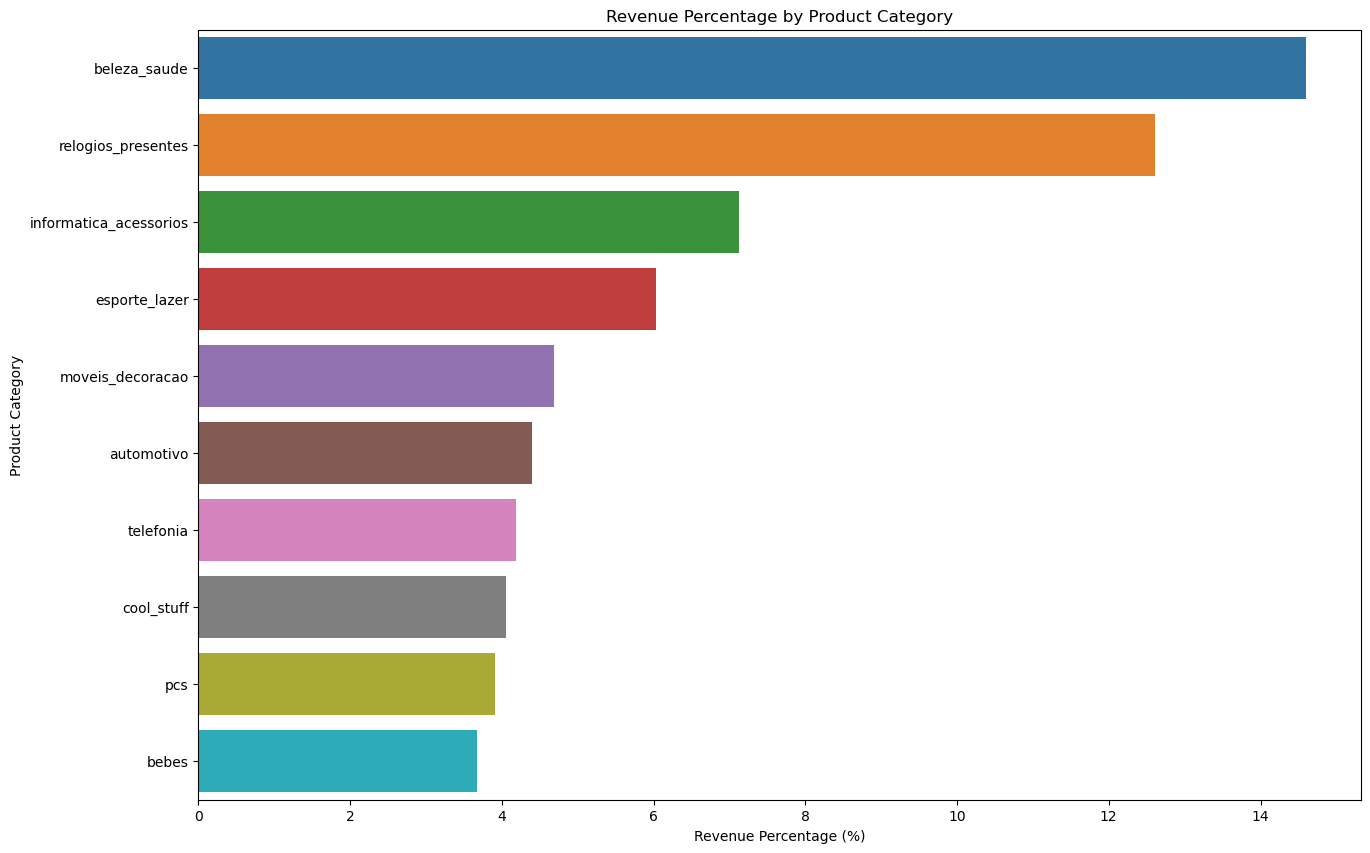

In [44]:
top_revenue_low_freq = df_product_cat[(df_product_cat['customer_state'] == 'PB') | 
                                        (df_product_cat['customer_state'] == 'AL') |    
                                        (df_product_cat['customer_state'] == 'AC') | 
                                        (df_product_cat['customer_state'] == 'RO') |
                                        (df_product_cat['customer_state'] == 'PA')][['price', 'product_category_name']]\
                            .groupby('product_category_name')\
                            .sum()\
                            .sort_values(by='price', ascending=False)\
                            .reset_index()

# Calculate total revenue
total_revenue = top_revenue_low_freq['price'].sum()

# Calculate percentage of revenue for each category
top_revenue_low_freq['revenue_percentage'] = (top_revenue_low_freq['price'] / total_revenue) * 100

# Sort by revenue_percentage
top_revenue_low_freq = top_revenue_low_freq.sort_values(by='revenue_percentage', ascending=False).head(10)

# Plot the percentages
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(y='product_category_name', x='revenue_percentage', data=top_revenue_low_freq, ax=ax)
plt.xlabel('Revenue Percentage (%)')
plt.ylabel('Product Category')
plt.title('Revenue Percentage by Product Category')
plt.show()

In [45]:
df_product_cat[['product_category_name', 'price']]\
    .groupby('product_category_name')\
    .mean()\
    .loc[list(top_revenue_low_freq.product_category_name.values)]\
    .sort_values(by='price', ascending=False)

,price
product_category_name,
pcs,1098.915276
relogios_presentes,198.713221
cool_stuff,164.149286
automotivo,139.844722
bebes,134.315271
beleza_saude,130.498567
informatica_acessorios,116.359485
esporte_lazer,113.244640
moveis_decoracao,87.243628


In [46]:
df_product_cat[['product_category_name', 'price']]\
    .groupby('product_category_name')\
    .mean()\
    .sort_values(by='price', ascending=False).head(20)

,price
product_category_name,
pcs,1098.915276
portateis_casa_forno_e_cafe,638.213151
eletrodomesticos_2,467.333117
agro_industria_e_comercio,342.553883
instrumentos_musicais,283.127097
portateis_cozinha_e_preparadores_de_alimentos,280.973571
eletroportateis,277.741824
telefonia_fixa,218.441320
construcao_ferramentas_seguranca,211.875519


NOTES:

- According to the results, the top 10 popular items overall is 'cama_mesa_banho', 'beleza_saude', 'esporte_lazer',
    'moveis_decoracao', 'informatica_acessorios', 'utilidades_domesticas', 'relogios_presentes', 'telefonia',
     'ferramentas_jardim', and 'automotivo'

- According to the results, the reason why the average income of (SP, RJ, MG, RS, PR) is lower than that of (PB, AL, AC, RO, PA) is because about 4% of the total income of (PB, AL, AC, RO, PA) comes from PCS purchases (which is the most expensive items) almost 2 times of the number two expensive item.

In [47]:
# Repeat Customers
#   It means a customer placed more than one order 
#   within a given month.

invoice_customer = df.groupby(['order_id', 'order_date'])\
                    .agg({'price': sum,
                         'customer_unique_id': 'first',
                         'customer_state': 'first',})\
                    .reset_index()
invoice_customer.head()

,order_id,order_date,price,customer_unique_id,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,58.90,871766c5855e863f6eccc05f988b23cb,RJ
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,239.90,eb28e67c4c0b83846050ddfb8a35d051,SP
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,199.00,3818d81c6709e39d06b2738a8d3a2474,MG
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,12.99,af861d436cfc08b2c2ddefd0ba074622,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,199.90,64b576fb70d441e8f1b2d7d446e483c5,SP


In [48]:
monthly_repeat_customers = invoice_customer\
                            .set_index('order_date')\
                            .groupby([pd.Grouper(freq='M'), 'customer_unique_id'])\
                            .filter(lambda x: len(x) > 1)\
                            .resample('M')\
                            .nunique()['customer_unique_id']
monthly_repeat_customers

order_date
2017-01-31     23
2017-02-28     20
2017-03-31     37
2017-04-30     26
2017-05-31     66
2017-06-30     58
2017-07-31     68
2017-08-31     73
2017-09-30     63
2017-10-31     60
2017-11-30    101
2017-12-31     59
2018-01-31     94
2018-02-28    146
2018-03-31     88
2018-04-30     52
2018-05-31     53
2018-06-30     37
2018-07-31     58
2018-08-31     38
Freq: M, Name: customer_unique_id, dtype: int64

In [49]:
monthly_unique_customers = df.set_index('order_date')['customer_unique_id']\
                            .resample('M')\
                            .nunique()

monthly_unique_customers

order_date
2017-01-31     718
2017-02-28    1630
2017-03-31    2508
2017-04-30    2274
2017-05-31    3479
2017-06-30    3076
2017-07-31    3802
2017-08-31    4114
2017-09-30    4083
2017-10-31    4417
2017-11-30    7183
2017-12-31    5450
2018-01-31    6974
2018-02-28    6400
2018-03-31    6914
2018-04-30    6744
2018-05-31    6693
2018-06-30    6061
2018-07-31    6100
2018-08-31    6310
Freq: M, Name: customer_unique_id, dtype: int64

In [50]:
monthly_repeat_percentage = (monthly_repeat_customers / monthly_unique_customers * 100).fillna(0)
monthly_repeat_percentage

order_date
2017-01-31    3.203343
2017-02-28    1.226994
2017-03-31    1.475279
2017-04-30    1.143360
2017-05-31    1.897097
2017-06-30    1.885566
2017-07-31    1.788532
2017-08-31    1.774429
2017-09-30    1.542983
2017-10-31    1.358388
2017-11-30    1.406098
2017-12-31    1.082569
2018-01-31    1.347863
2018-02-28    2.281250
2018-03-31    1.272780
2018-04-30    0.771056
2018-05-31    0.791872
2018-06-30    0.610460
2018-07-31    0.950820
2018-08-31    0.602219
Freq: M, Name: customer_unique_id, dtype: float64

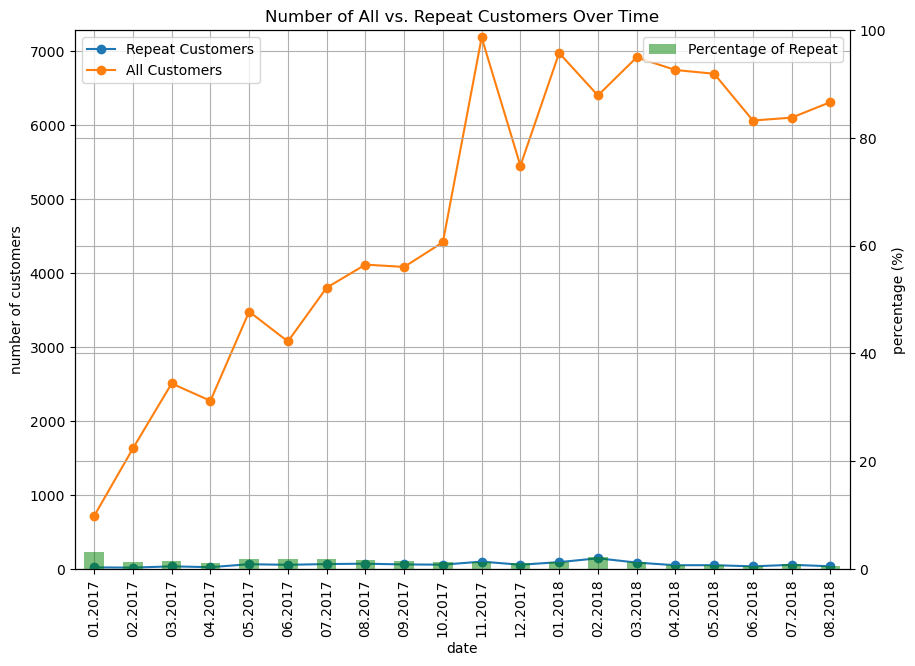

In [76]:
ax = pd.DataFrame(monthly_repeat_customers.values).plot(
    figsize=(10,7), marker='o'
)

pd.DataFrame(monthly_unique_customers.values).plot(
    ax=ax,
    grid=True,
    marker='o'
)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.5
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers.index], 
    rotation=45
)

plt.show()

In [52]:
# Revenue from Repeat Customers
monthly_rev_repeat_customers = invoice_customer\
                                .set_index('order_date')\
                                .groupby([pd.Grouper(freq='M'), 'customer_unique_id'])\
                                .filter(lambda x: len(x) > 1)\
                                .resample('M')\
                                .agg({'price': sum})['price']
monthly_rev_repeat_customers

order_date
2017-01-31     4233.08
2017-02-28     4897.02
2017-03-31     7669.02
2017-04-30    11242.60
2017-05-31    16209.32
2017-06-30    10834.95
2017-07-31    14183.67
2017-08-31    17081.52
2017-09-30    16364.06
2017-10-31    11930.87
2017-11-30    24227.29
2017-12-31    16275.12
2018-01-31    22798.58
2018-02-28    34153.78
2018-03-31    20813.42
2018-04-30    15045.58
2018-05-31    19480.89
2018-06-30     8890.92
2018-07-31    13757.57
2018-08-31    13390.15
Freq: M, Name: price, dtype: float64

In [53]:
monthly_revenue = df.set_index('order_date')\
                    .resample('M')\
                    .agg({'price': sum})['price']
monthly_revenue

order_date
2017-01-31    111798.36
2017-02-28    234223.40
2017-03-31    359198.85
2017-04-30    340669.68
2017-05-31    489338.25
2017-06-30    421923.37
2017-07-31    481604.52
2017-08-31    554699.70
2017-09-30    607399.67
2017-10-31    648247.65
2017-11-30    987765.37
2017-12-31    726033.19
2018-01-31    924645.00
2018-02-28    826437.13
2018-03-31    953356.25
2018-04-30    973534.09
2018-05-31    977544.69
2018-06-30    856077.86
2018-07-31    867953.46
2018-08-31    838576.64
Freq: M, Name: price, dtype: float64

In [54]:
monthly_rev_perc_repeat_customers = (monthly_rev_repeat_customers / monthly_revenue * 100.0).fillna(0)
monthly_rev_perc_repeat_customers

order_date
2017-01-31    3.786353
2017-02-28    2.090748
2017-03-31    2.135035
2017-04-30    3.300147
2017-05-31    3.312498
2017-06-30    2.567990
2017-07-31    2.945087
2017-08-31    3.079418
2017-09-30    2.694117
2017-10-31    1.840480
2017-11-30    2.452737
2017-12-31    2.241650
2018-01-31    2.465658
2018-02-28    4.132653
2018-03-31    2.183173
2018-04-30    1.545460
2018-05-31    1.992839
2018-06-30    1.038564
2018-07-31    1.585058
2018-08-31    1.596771
Freq: M, Name: price, dtype: float64

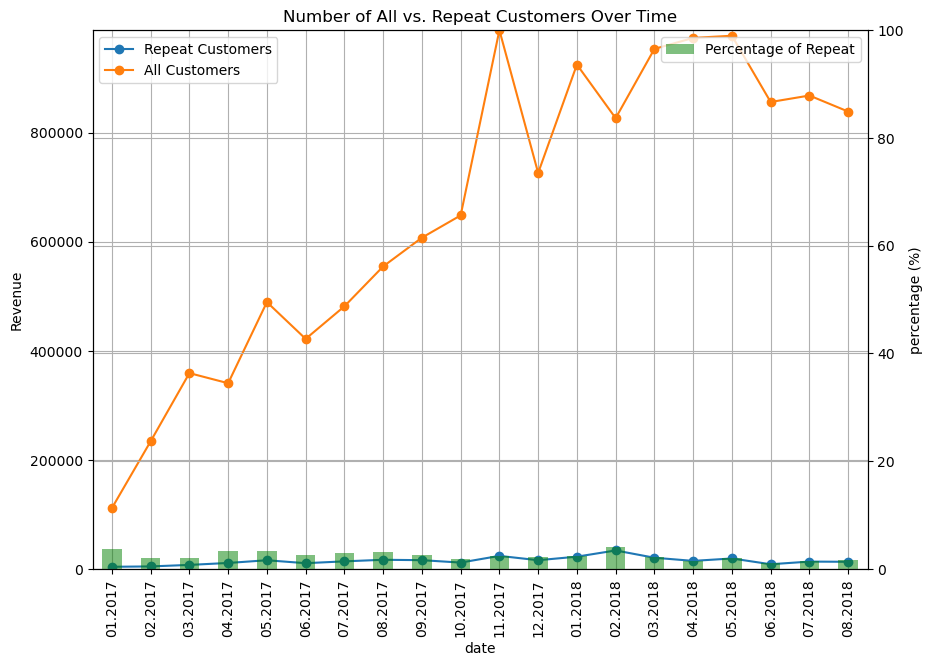

In [75]:
ax = pd.DataFrame(monthly_rev_repeat_customers.values).plot(
    figsize=(10,7),
    marker='o'
)

pd.DataFrame(monthly_revenue.values).plot(
    ax=ax,
    grid=True,
    marker='o'
)


ax2 = pd.DataFrame(monthly_rev_perc_repeat_customers.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.5

)

ax.set_xlabel('date')
ax.set_ylabel('Revenue')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_revenue.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_rev_repeat_customers.index)), 
    [x.strftime('%m.%Y') for x in monthly_rev_repeat_customers.index], 
    rotation=45
)

plt.show()

In [56]:
# df.to_csv('cleaned_df.csv', index=False)

# Cohort Analysis

In [57]:
# Create cohort table (general)

cohort_data = pd.DataFrame(pd.to_datetime(df['order_date'].dt.strftime('%Y-%m-%d')))\
                .rename(columns={'order_date': 'cohortDate'})
cohort_data['customer_unique_id'] = df['customer_unique_id']
cohort_data = cohort_data.groupby('customer_unique_id').min().reset_index()

cohort_data['cohortYearMonth'] = cohort_data['cohortDate'].dt.to_period('M')
df['orderYearMonth'] = df['order_date'].dt.to_period('M')

merged_cohort = pd.merge(df, cohort_data, on='customer_unique_id')
merged_cohort['cohortIndex'] = (
    (merged_cohort['orderYearMonth'].dt.year - merged_cohort['cohortYearMonth'].dt.year) * 12 +
    (merged_cohort['orderYearMonth'].dt.month - merged_cohort['cohortYearMonth'].dt.month)
)

merged_cohort.head()

,order_id,customer_unique_id,product_id,seller_id,order_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state,orderYearMonth,cohortDate,cohortYearMonth,cohortIndex
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,29.99,8.72,3149,sao paulo,SP,2017-10,2017-09-04,2017-09,1
1,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-04 11:26:38,35.39,8.72,3149,sao paulo,SP,2017-09,2017-09-04,2017-09,0
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,118.70,22.76,47813,barreiras,BA,2018-07,2018-07-24,2018-07,0
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,159.90,19.22,75265,vianopolis,GO,2018-08,2018-08-08,2018-08,0
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,45.00,27.20,59296,sao goncalo do amarante,RN,2017-11,2017-11-18,2017-11,0


**Customer Retention**

In [58]:
cohort_count = merged_cohort.groupby(['cohortYearMonth', 'cohortIndex'])['customer_unique_id'].nunique().reset_index()
pivot_cohort_count = cohort_count.pivot(index='cohortYearMonth', columns='cohortIndex', values='customer_unique_id')

pivot_cohort_count

cohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohortYearMonth,,,,,,,,,,,,,,,,,,,
2017-01,718.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN
2017-04,2257.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN
2017-05,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,9.0,12.0,8.0,1.0,6.0,7.0,NaN,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,6.0,9.0,11.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN
2017-07,3753.0,20.0,13.0,9.0,11.0,8.0,12.0,4.0,7.0,10.0,8.0,11.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN
2017-08,4057.0,28.0,14.0,11.0,14.0,21.0,12.0,11.0,6.0,6.0,10.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4005.0,28.0,22.0,11.0,18.0,9.0,9.0,10.0,11.0,8.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


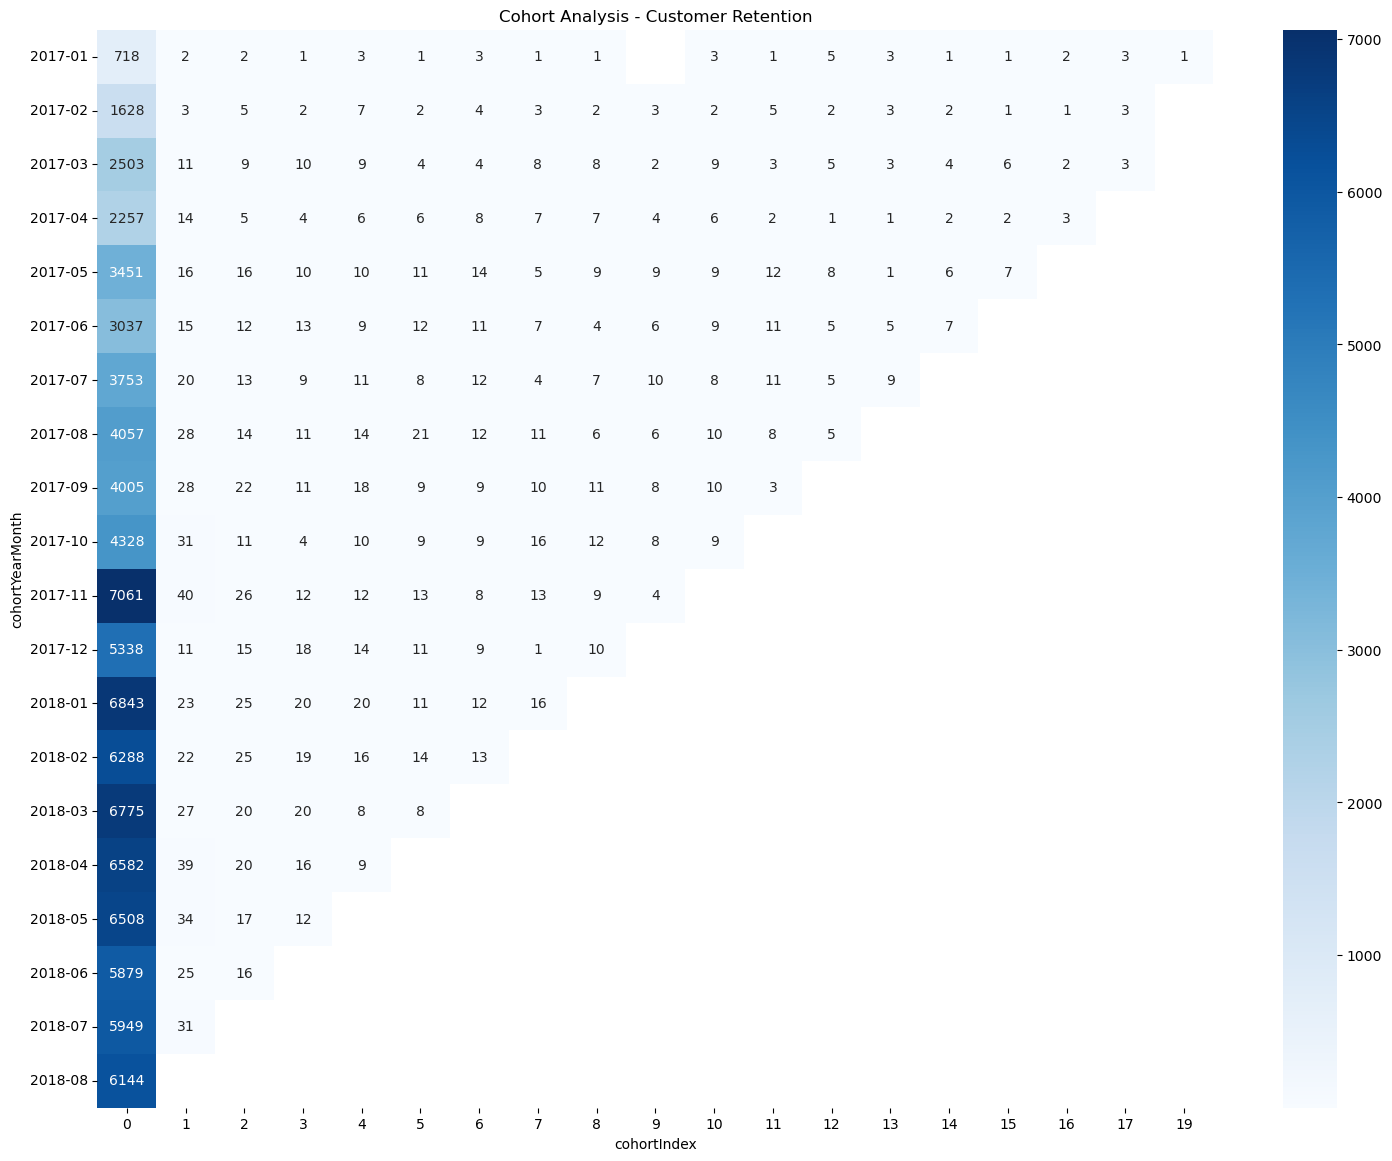

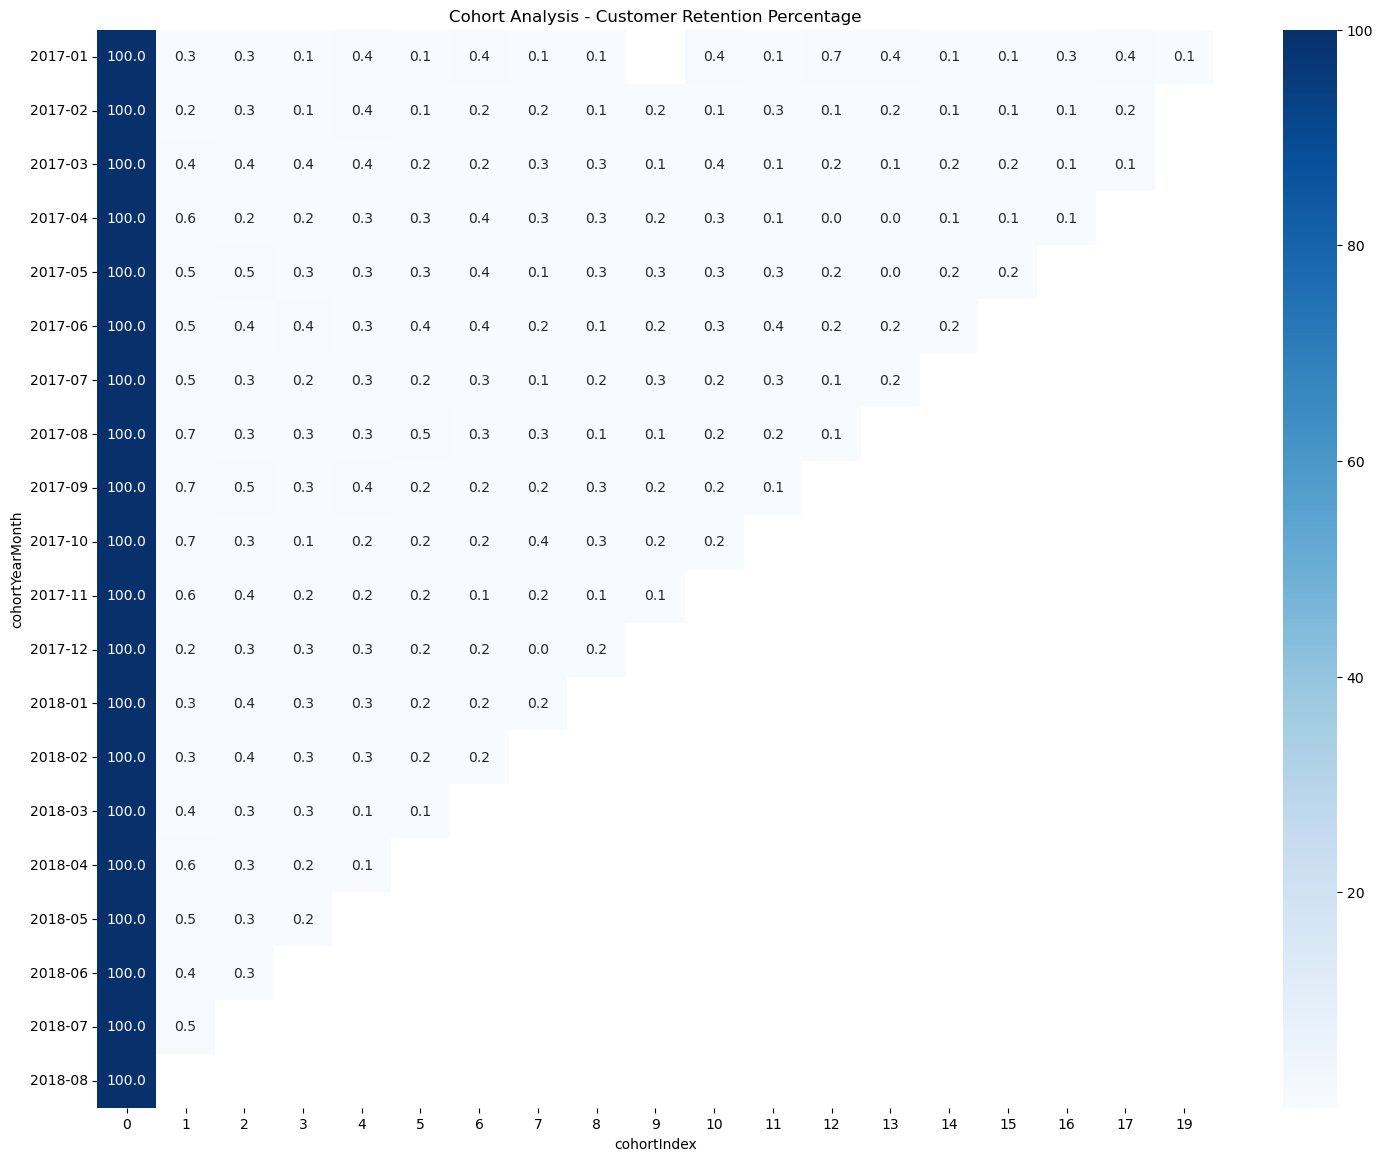

In [59]:
cohort_sizes = pivot_cohort_count.iloc[:,0]
pivot_cohort_count_perc = pivot_cohort_count.divide(cohort_sizes, axis=0) * 100

plt.figure(figsize=(18, 14))
plt.title('Cohort Analysis - Customer Retention')
sns.heatmap(data=pivot_cohort_count, annot=True, fmt='.0f', cmap='Blues')
plt.show()

plt.figure(figsize=(18, 14))
plt.title('Cohort Analysis - Customer Retention Percentage')
sns.heatmap(data=pivot_cohort_count_perc, annot=True, fmt='.1f', cmap='Blues')
plt.show()

**Customer Revenue**

In [60]:
merged_cohort.head()

,order_id,customer_unique_id,product_id,seller_id,order_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state,orderYearMonth,cohortDate,cohortYearMonth,cohortIndex
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,29.99,8.72,3149,sao paulo,SP,2017-10,2017-09-04,2017-09,1
1,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-04 11:26:38,35.39,8.72,3149,sao paulo,SP,2017-09,2017-09-04,2017-09,0
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,118.70,22.76,47813,barreiras,BA,2018-07,2018-07-24,2018-07,0
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,159.90,19.22,75265,vianopolis,GO,2018-08,2018-08-08,2018-08,0
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,45.00,27.20,59296,sao goncalo do amarante,RN,2017-11,2017-11-18,2017-11,0


In [61]:
cohort_revenue = merged_cohort.groupby(['cohortYearMonth', 'cohortIndex'])['price'].sum().reset_index()

pivot_cohort_revenue = cohort_revenue.pivot(index='cohortYearMonth', columns='cohortIndex', values='price')
pivot_cohort_revenue

cohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohortYearMonth,,,,,,,,,,,,,,,,,,,
2017-01,111798.36,76.12,82.89,75.00,199.70,59.99,372.95,79.80,25.90,NaN,373.10,49.00,456.14,298.80,48.00,89.90,163.90,319.79,38.0
2017-02,234147.28,434.90,484.50,89.25,978.22,49.99,583.89,234.89,432.80,285.76,318.90,382.78,247.00,279.80,143.80,117.00,251.80,325.90,NaN
2017-03,358681.06,1372.26,1452.24,1645.05,989.33,1306.99,593.68,737.68,1181.99,206.49,601.12,306.04,785.35,168.89,617.70,608.60,154.89,235.79,NaN
2017-04,338737.92,2638.53,800.38,670.78,1040.29,1046.38,1832.67,933.85,859.58,439.49,566.07,264.50,149.90,252.00,257.80,211.75,894.89,NaN,NaN
2017-05,484958.53,1504.60,2374.78,1321.57,1048.69,1331.95,2668.07,541.50,1382.57,1059.84,1183.84,1157.26,891.59,46.90,514.65,522.38,NaN,NaN,NaN
2017-06,416935.13,1765.30,1742.94,1278.55,1243.77,1395.68,1245.67,663.05,275.70,364.67,2020.28,1830.36,388.81,939.29,2278.98,NaN,NaN,NaN,NaN
2017-07,475381.39,2602.45,1068.75,1005.16,912.24,1653.48,2235.46,192.90,256.27,1835.54,1006.69,969.20,1274.29,681.70,NaN,NaN,NaN,NaN,NaN
2017-08,546021.77,4270.76,1905.19,804.74,1471.76,2534.33,1589.63,1600.60,1631.69,1067.78,1150.83,1695.64,504.87,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,597832.07,2986.05,2823.74,1403.45,2861.49,1633.58,872.07,795.24,982.89,508.19,977.79,255.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN


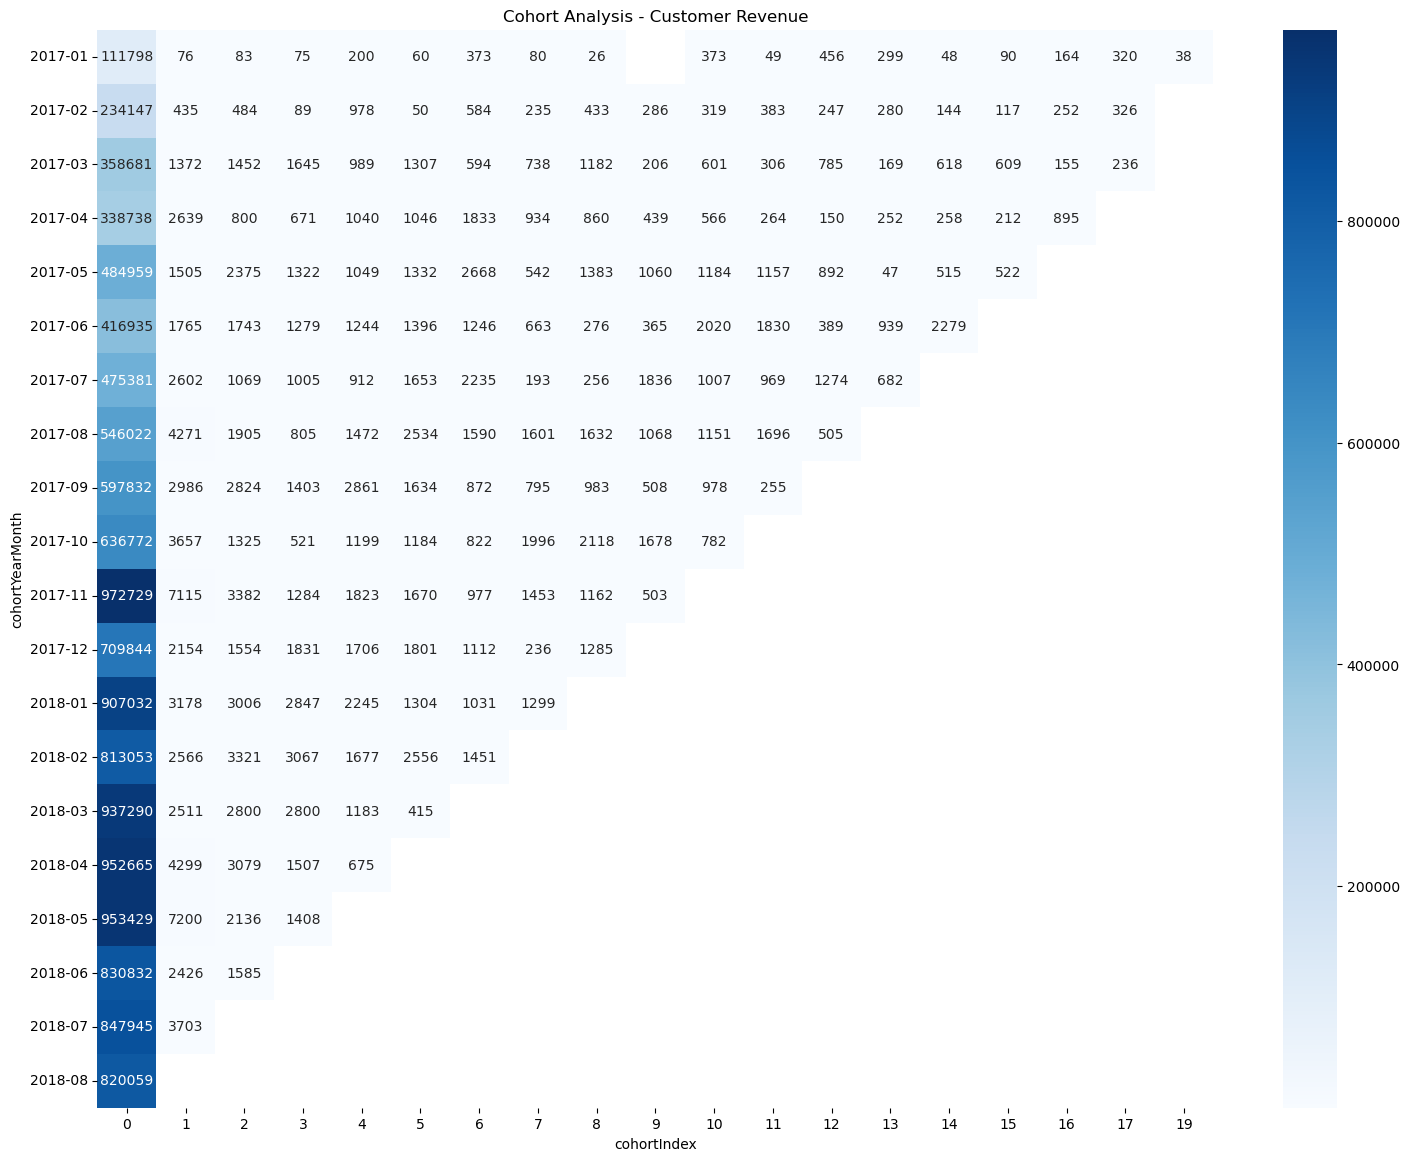

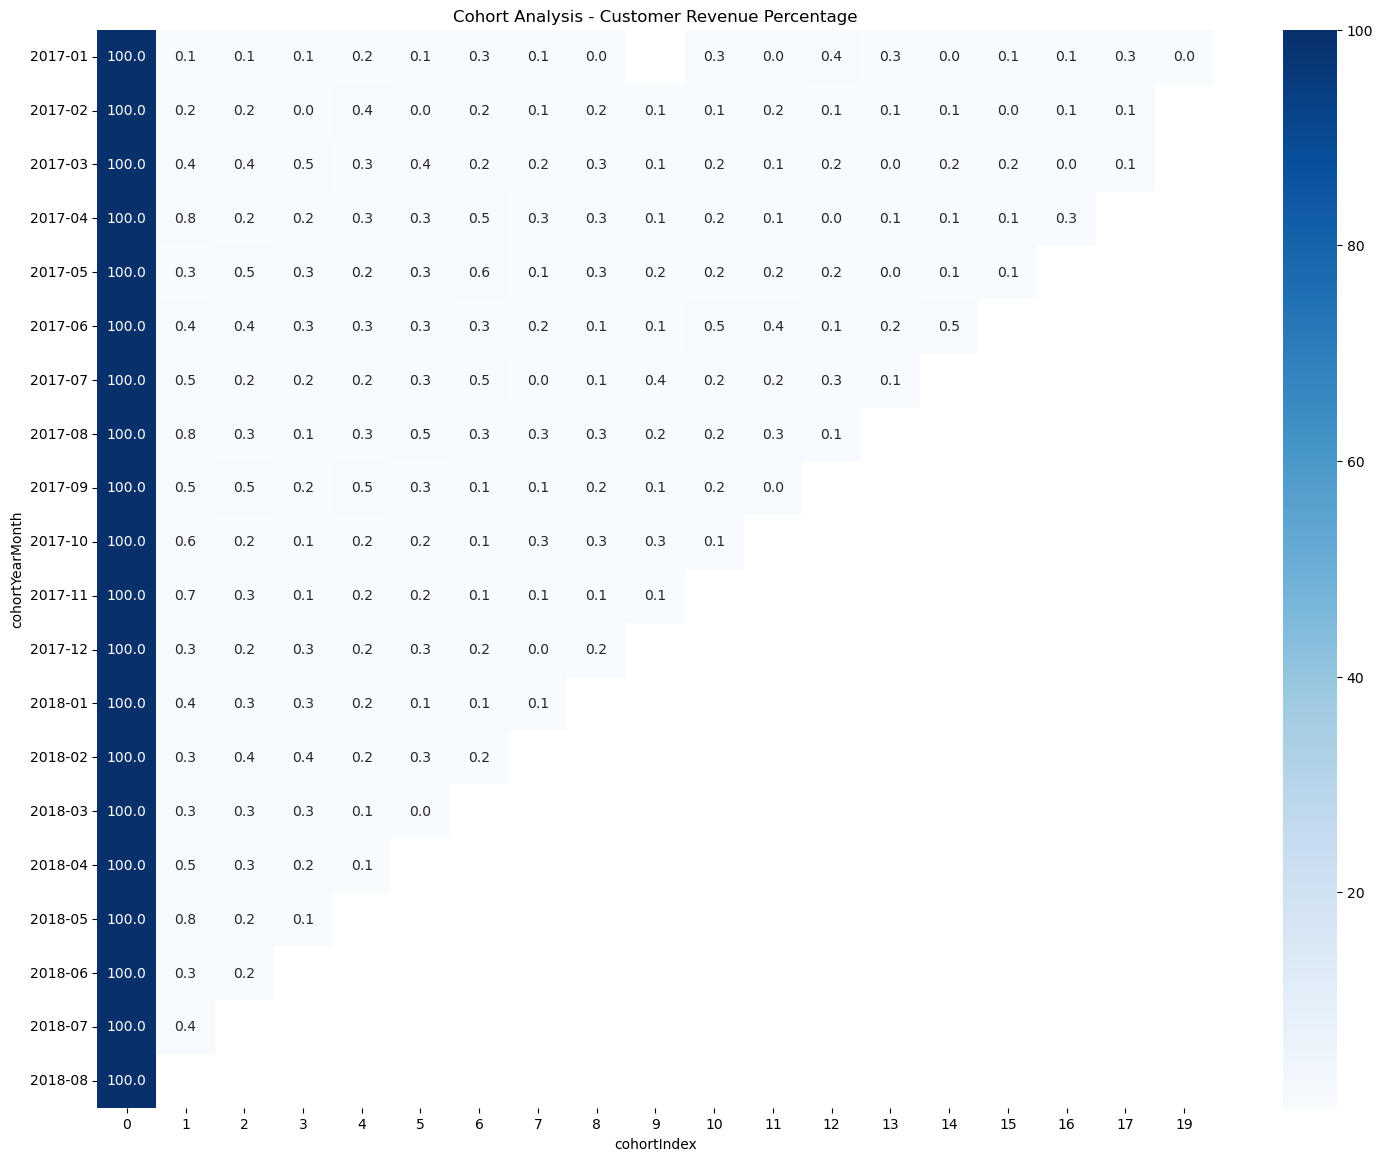

In [85]:
pivot_cohort_revenue_perc = pivot_cohort_revenue.divide(pivot_cohort_revenue.iloc[:,0], axis=0) * 100

plt.figure(figsize=(18, 14))
plt.title('Cohort Analysis - Customer Revenue')
sns.heatmap(data=pivot_cohort_revenue, annot=True, fmt='.0f', cmap='Blues')
plt.show()

plt.figure(figsize=(18, 14))
plt.title('Cohort Analysis - Customer Revenue Percentage')
sns.heatmap(data=pivot_cohort_revenue_perc, annot=True, fmt='.1f', cmap='Blues')
plt.show()

**Customer Lifetime Value**

In [67]:
pivot_cohort_clv = pivot_cohort_revenue.copy()

pivot_cohort_clv = pivot_cohort_clv.cumsum(axis=1).divide(cohort_sizes, axis=0)

pivot_cohort_clv

cohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohortYearMonth,,,,,,,,,,,,,,,,,,,
2017-01,155.708022,155.814039,155.929485,156.033942,156.312075,156.395627,156.915056,157.026198,157.062270,NaN,157.581908,157.650153,158.285446,158.701602,158.768454,158.893663,159.121936,159.567326,159.620251
2017-02,143.825111,144.092248,144.389853,144.444674,145.045547,145.076253,145.434908,145.579189,145.845037,146.020565,146.216450,146.451572,146.603292,146.775160,146.863489,146.935356,147.090025,147.290209,NaN
2017-03,143.300463,143.848710,144.428909,145.086141,145.481398,146.003568,146.240755,146.535473,147.007703,147.090200,147.330360,147.452629,147.766392,147.833867,148.080651,148.323799,148.385681,148.479884,NaN
2017-04,150.083261,151.252304,151.606925,151.904125,152.365042,152.828658,153.640651,154.054409,154.435259,154.629982,154.880789,154.997980,155.064395,155.176048,155.290270,155.384089,155.780585,NaN,NaN
2017-05,140.526957,140.962947,141.651090,142.034042,142.337922,142.723883,143.497012,143.653924,144.054552,144.361663,144.704706,145.040046,145.298403,145.311994,145.461124,145.612495,NaN,NaN,NaN
2017-06,137.285193,137.866457,138.440359,138.861350,139.270889,139.730448,140.140612,140.358936,140.449717,140.569793,141.235015,141.837702,141.965726,142.275008,143.025413,NaN,NaN,NaN,NaN
2017-07,126.667037,127.360469,127.645241,127.913070,128.156139,128.596715,129.192361,129.243760,129.312044,129.801130,130.069366,130.327613,130.667152,130.848793,NaN,NaN,NaN,NaN,NaN
2017-08,134.587570,135.640259,136.109864,136.308223,136.670993,137.295674,137.687498,138.082026,138.484217,138.747412,139.031077,139.449031,139.573475,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,149.271428,150.017009,150.722062,151.072487,151.786966,152.194851,152.412597,152.611159,152.856574,152.983463,153.227605,153.291381,NaN,NaN,NaN,NaN,NaN,NaN,NaN


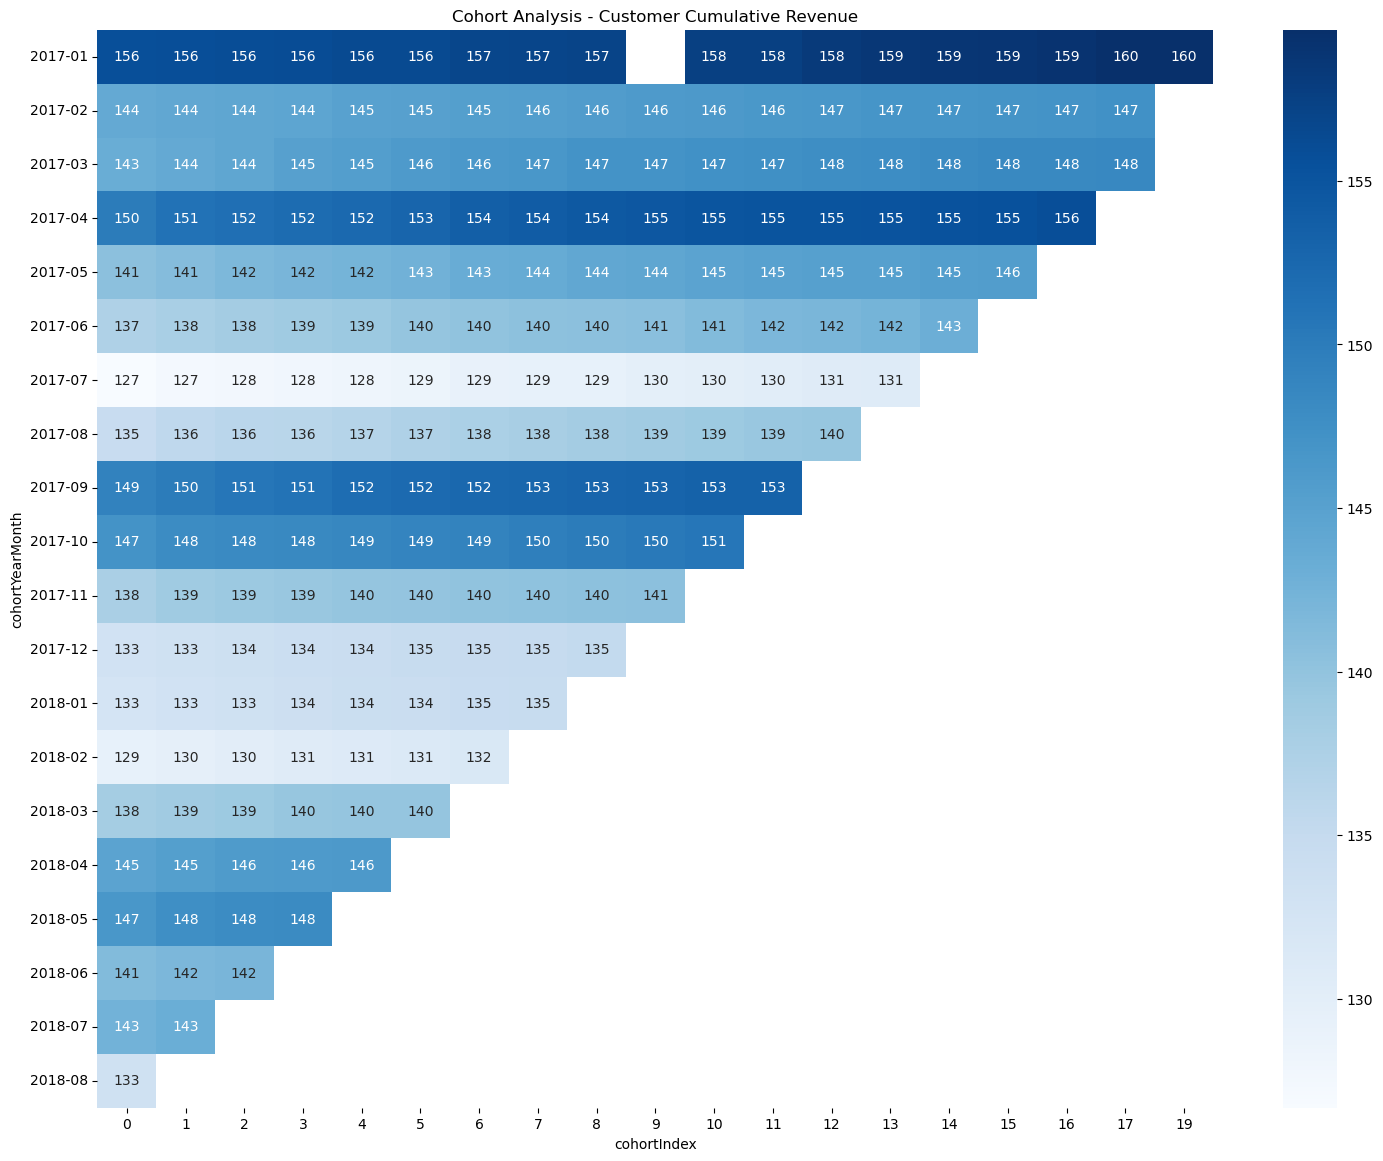

In [68]:
plt.figure(figsize=(18, 14))
plt.title('Cohort Analysis - Customer Cumulative Revenue')
sns.heatmap(data=pivot_cohort_clv, annot=True, fmt='.0f', cmap='Blues')
plt.show()